In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing necessary libraries

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Define path for training and validation data, batch and image size

In [12]:
train_dir = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/train'
validation_dir = '/content/drive/MyDrive/Product_Recognition_Categorisation/Dataset/validation'
batch_size = 32
image_size = (64, 64)

Function to load dataset

In [13]:
def load_dataset(directory, batch_size, image_size, shuffle=True):
    return tf.keras.utils.image_dataset_from_directory(
        directory,
        labels="inferred",
        label_mode="categorical",
        color_mode="rgb",
        batch_size=batch_size,
        image_size=image_size,
        shuffle=shuffle
    )

Load training and validation both datasets

In [14]:
# Training dataset
main_category_dataset = load_dataset(train_dir, batch_size, image_size)

# Validation dataset
validation_main_category_dataset = load_dataset(validation_dir, batch_size, image_size)

Found 3425 files belonging to 3 classes.
Found 404 files belonging to 3 classes.


Extract three main categories: Fruits, Vegetables, Packages

In [15]:
main_categories = main_category_dataset.class_names
print(f"Main categories: {main_categories}")

Main categories: ['Fruits', 'Packages', 'Vegetables']


Build, Compile, Fit and Save the model

In [16]:
main_category_model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(main_categories), activation='softmax')
])

In [17]:
main_category_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history=main_category_model.fit(main_category_dataset, validation_data=validation_main_category_dataset, epochs=30)

Epoch 1/30
108/108 [==============================] - 35s 260ms/step - loss: 11.6878 - accuracy: 0.6123 - val_loss: 0.8130 - val_accuracy: 0.6881
Epoch 2/30
108/108 [==============================] - 20s 174ms/step - loss: 0.6785 - accuracy: 0.7066 - val_loss: 0.6907 - val_accuracy: 0.7748
Epoch 3/30
108/108 [==============================] - 20s 181ms/step - loss: 0.5070 - accuracy: 0.7781 - val_loss: 0.5736 - val_accuracy: 0.8639
Epoch 4/30
108/108 [==============================] - 17s 145ms/step - loss: 0.3391 - accuracy: 0.8599 - val_loss: 0.6595 - val_accuracy: 0.8614
Epoch 5/30
108/108 [==============================] - 17s 149ms/step - loss: 0.2141 - accuracy: 0.9238 - val_loss: 0.9104 - val_accuracy: 0.8515
Epoch 6/30
108/108 [==============================] - 17s 148ms/step - loss: 0.1994 - accuracy: 0.9352 - val_loss: 0.7209 - val_accuracy: 0.8639
Epoch 7/30
108/108 [==============================] - 17s 149ms/step - loss: 0.1687 - accuracy: 0.9533 - val_loss: 1.1883 - val_a

In [19]:
main_category_model.save('/content/drive/MyDrive/Product_Recognition_Categorisation/Models/main_category_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Plot training & validation accuracy values

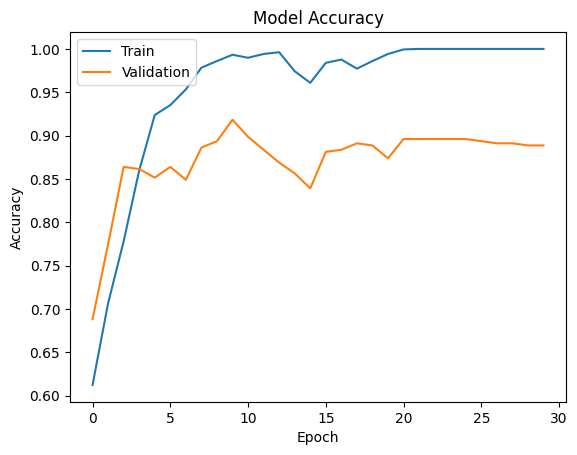

In [20]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Plot training & validation loss values

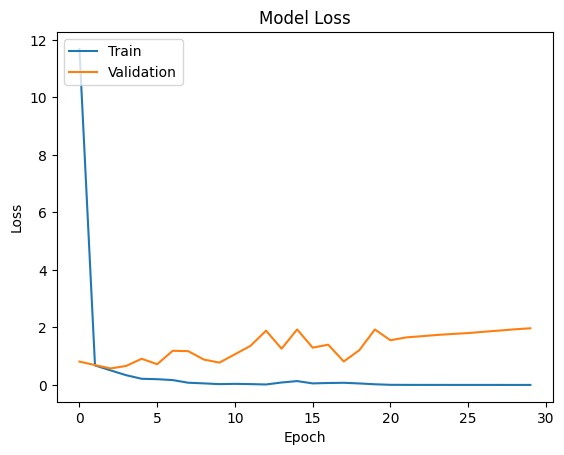

In [21]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()